# The Titanic Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree

In [2]:
t_df=pd.read_csv('../../data/titanic_train.csv')

In [3]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Examine and visualize the data¶

In [4]:
t_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
t_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
t_df[t_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Missing value found for the feature "Age" (177 Rows)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

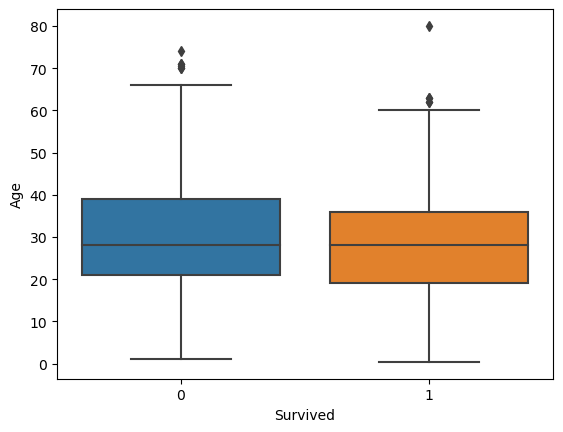

In [7]:
sns.boxplot(x='Survived',y='Age',data=t_df[~t_df['Age'].isnull()])

The age has very little bearing on the survival rate. Let's examine the survival rate by class so that we can determine whether to update the "Age" value that is missing.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

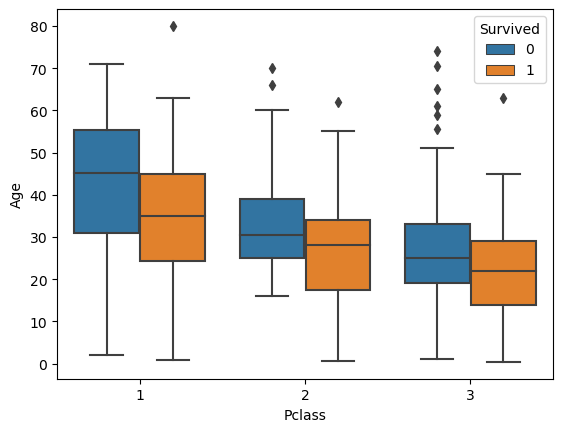

In [8]:
sns.boxplot(x='Pclass',y='Age',hue='Survived',data=t_df[~t_df['Age'].isnull()])

In every class, the percentage of elderly persons who do not survive is quite large.

so it is good replace the null value with mode value for "Age" feature

<AxesSubplot:xlabel='Pclass', ylabel='count'>

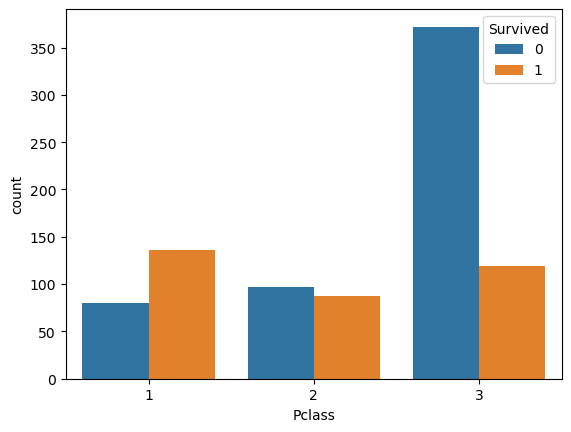

In [9]:
sns.countplot(data=t_df,x='Pclass',hue='Survived')

Passengers in third class are much more likely to die than other passengers.

<AxesSubplot:xlabel='Sex', ylabel='count'>

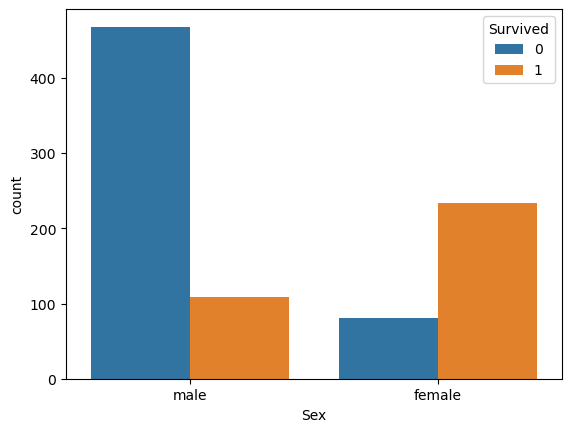

In [10]:
sns.countplot(data=t_df,x='Sex',hue='Survived')

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


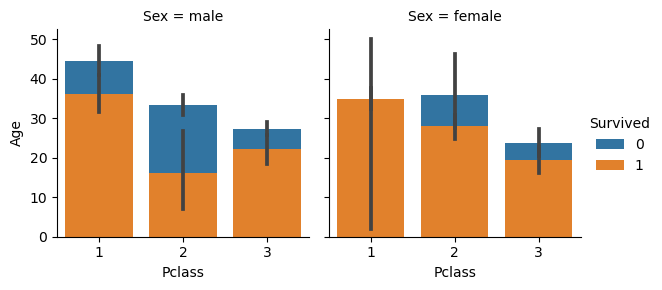

In [11]:
g=sns.FacetGrid(t_df,col='Sex',hue='Survived')
g=g.map(sns.barplot,'Pclass','Age')
g.add_legend()

If they are in first class, the majority of the female passengers are still alive.

In [12]:
t_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

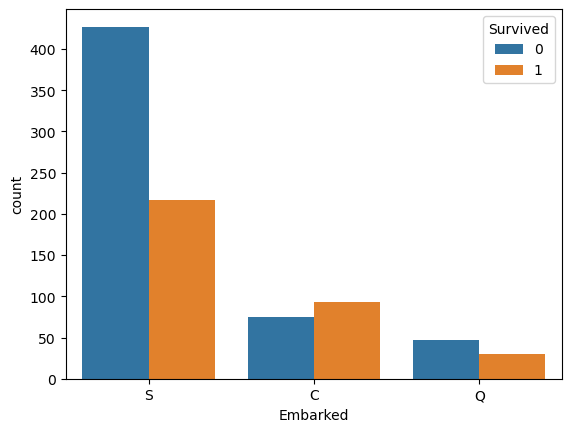

In [13]:
sns.countplot(data=t_df,x='Embarked',hue='Survived')

If Embarked is "S," then the likelihood of survival is very low.

In [14]:
t_df=t_df.drop(columns='PassengerId') # PassengerId can be dropped since we can do nothing about it

<AxesSubplot:>

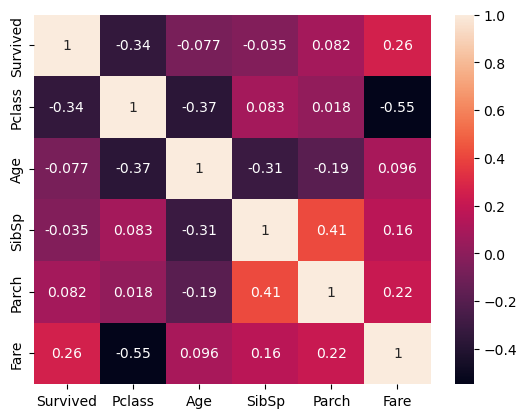

In [15]:
sns.heatmap(t_df.corr(),annot=True)

Pclass and Fare have strong positive and negative correlations, respectively, to the target variable. On the other side, there is a strong correlation between Pclass and Fare. therefore, any one of these variables may be dropped.

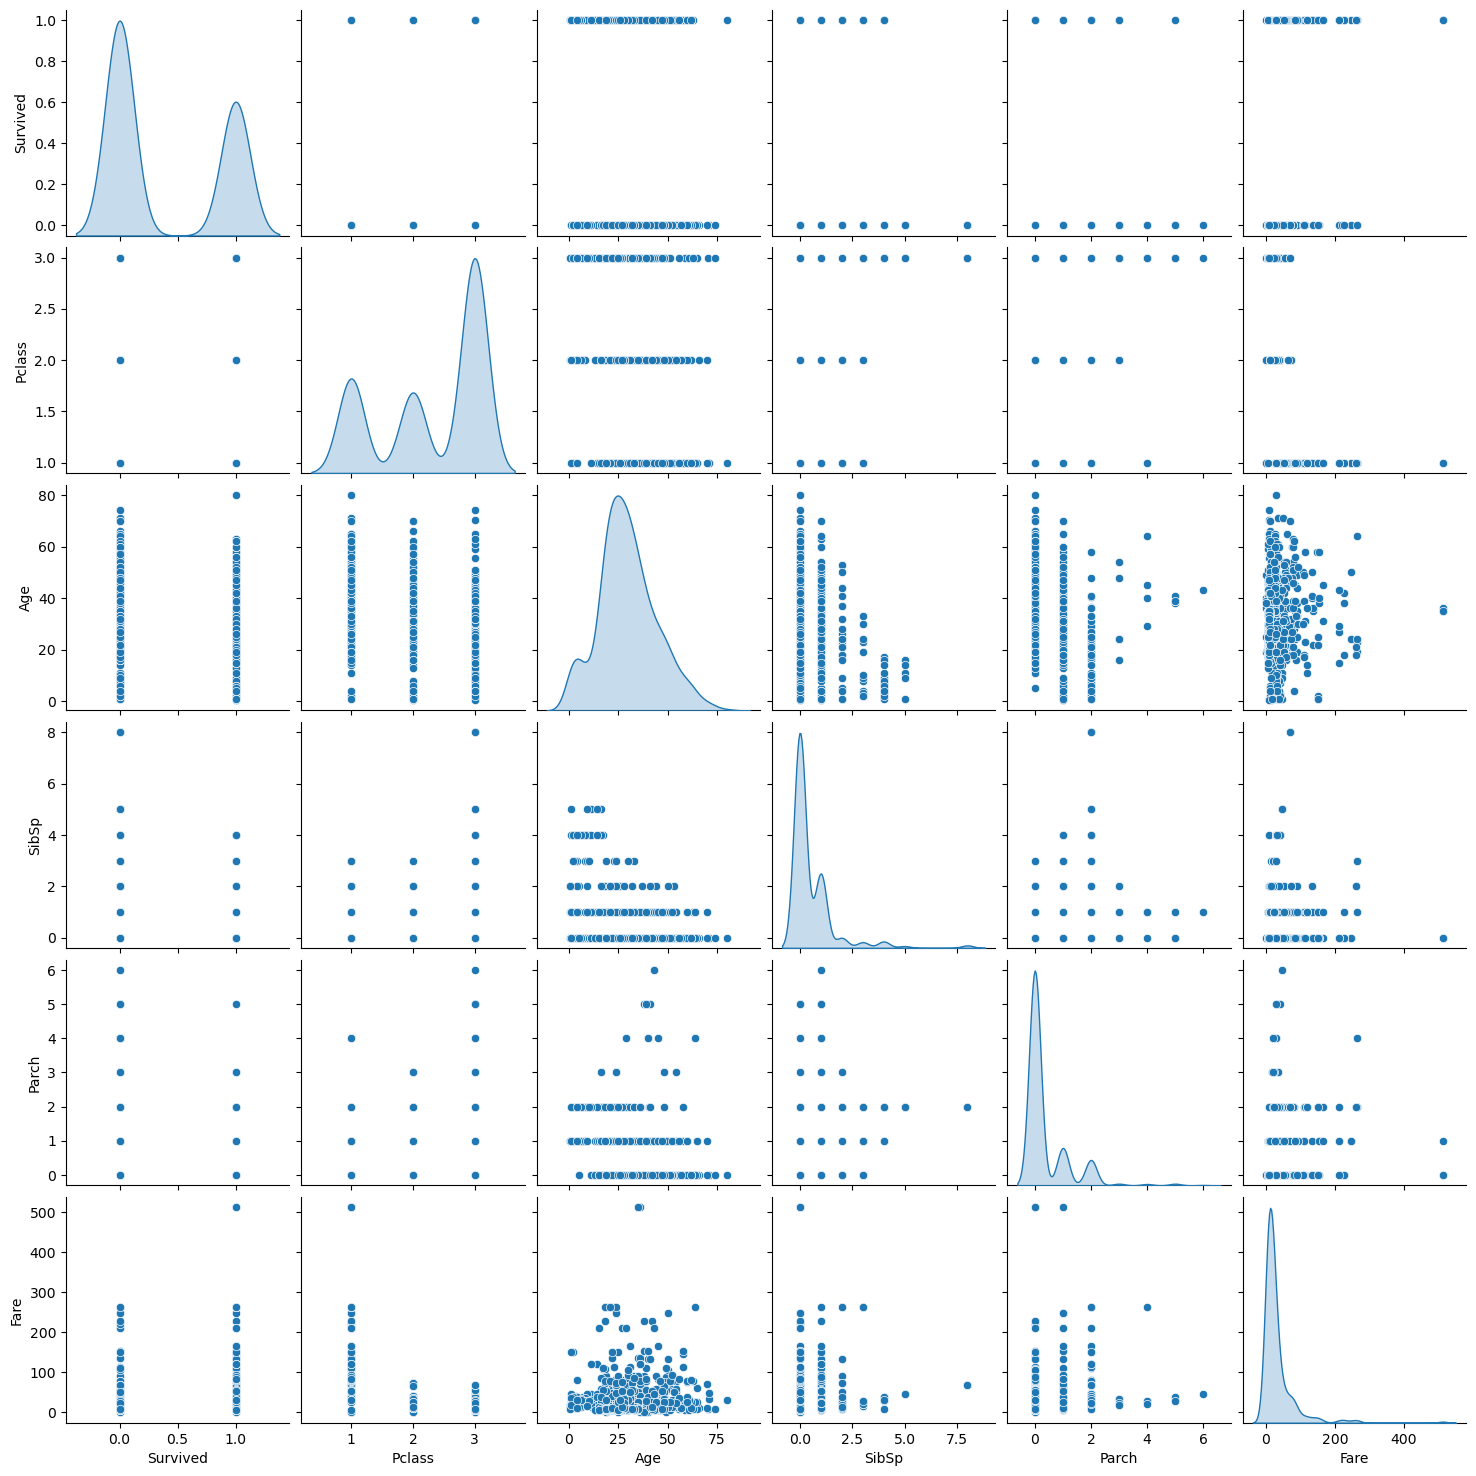

In [16]:
sns.pairplot(t_df,diag_kind='kde')

Pclass and fare have a weakly inverse relationship. There isn't much other information on it.

## Feature Engineering

### Missing Value Treatment

In [17]:
features_nan=[feature for feature in t_df.columns if  t_df[feature].isnull().sum()>1]


In [18]:
features_nan

['Age', 'Cabin', 'Embarked']

In [19]:
for feature in features_nan:
    print('Feature : {} , % of null : {}'.format(feature,np.round(t_df[feature].isnull().mean(),3) *100))

Feature : Age , % of null : 19.900000000000002
Feature : Cabin , % of null : 77.10000000000001
Feature : Embarked , % of null : 0.2


Cabin has 77% null values found. Thus, it might not be a good predictor and could be discarded.
Mode values can be used to replace Age and Embarked.

In [20]:
t_df.drop(columns=['Cabin'],inplace=True)

In [21]:
# Name and Ticket features are not much useful for the prediction. It can be dropped.
t_df.drop(columns=['Name','Ticket'],inplace=True)

In [22]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [24]:
imp_df=t_df[['Age','Embarked']]

In [25]:
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Embarked  889 non-null    object 
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


In [26]:
imp_df_scaled=imp.fit_transform(imp_df)

In [27]:
imputed_df=pd.DataFrame(imp_df_scaled,columns=imp_df.columns)

In [28]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       891 non-null    object
 1   Embarked  891 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [29]:
t_df['Age']=imputed_df['Age']
t_df['Embarked']=imputed_df['Embarked']

In [30]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [31]:
t_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [32]:
t_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
t_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
t_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
t_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
num_cols=['Age','SibSp','Parch','Fare']

In [37]:
# All of these variables can be converted to category variable for encoding
# Survived is target variable - so it can be ignored for the type conversion
category_cols=['Pclass','Sex','Embarked']
for col in category_cols:
    t_df[col]=t_df[col].astype('category')

In [38]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    object  
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 37.9+ KB


### Encoding

In [39]:
encoded_df = pd.get_dummies(t_df, columns = category_cols,drop_first=True)


In [40]:
encoded_df

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,24.0,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


In [41]:
y=pd.DataFrame({'Survived':encoded_df['Survived']})
X=encoded_df.drop(columns=['Survived'])

In [42]:
X.head(4)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1


In [43]:
y.head(4)

,Survived
0,0
1,1
2,1
3,1


### Scaling

In [44]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(X)
X_scaled=pd.DataFrame(scaled_df,columns=X.columns)

In [45]:
X_scaled.head(3)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.497793,0.432793,-0.473674,-0.502445,-0.510152,0.902587,0.737695,-0.307562,0.615838
1,0.715048,0.432793,-0.473674,0.786845,-0.510152,-1.107926,-1.355574,-0.307562,-1.623803
2,-0.194583,-0.474545,-0.473674,-0.488854,-0.510152,0.902587,-1.355574,-0.307562,0.615838


In [46]:
X.head(3)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1


## Model Building

### SGDClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 11)
sgd=SGDClassifier(average = True, shuffle = False)
sgd.fit(X_train,y_train.to_numpy().ravel())

SGDClassifier(average=True, shuffle=False)

In [48]:
print ('Intercept : ', sgd.intercept_)
print ('Coef : ', sgd.coef_)
print ('Accuracy for training data: ', sgd.score (X_train, y_train))
print ('Accuracy for test data: ', sgd.score (X_test, y_test))

Intercept :  [-1.24313809]
Coef :  [[-1.43146516 -1.60727386 -0.58437147  1.19500697 -0.52363144 -2.15994564
  -3.93982294 -0.01529377 -0.17084503]]
Accuracy for training data:  0.7780898876404494
Accuracy for test data:  0.8659217877094972


In [49]:
prediction=sgd.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[108  10]
 [ 14  47]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.82      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179



### LinearSVC

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 11)
lsvm=LinearSVC(random_state=11)
lsvm.fit(X_train,y_train.to_numpy().ravel())

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=11)

In [51]:
print ('Intercept : ', lsvm.intercept_)
print ('Coef : ', lsvm.coef_)
print ('Accuracy for training data: ', lsvm.score (X_train, y_train))
print ('Accuracy for test data: ', lsvm.score (X_test, y_test))

Intercept :  [-0.21941836]
Coef :  [[-0.14503245 -0.10746872 -0.01581327  0.00297328 -0.12430204 -0.36324364
  -0.47570252 -0.00828826 -0.04849295]]
Accuracy for training data:  0.7808988764044944
Accuracy for test data:  0.8547486033519553


In [52]:
prediction=lsvm.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[107  11]
 [ 15  46]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



### SVC

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 11)
svc=SVC()
svc.fit(X_train,y_train.to_numpy().ravel())

SVC()

In [54]:
print ('Intercept : ', svc.intercept_)
#print ('Coef : ', svc.coef_)
print ('Accuracy for training data: ', svc.score (X_train, y_train))
print ('Accuracy for test data: ', svc.score (X_test, y_test))

Intercept :  [-0.13439928]
Accuracy for training data:  0.8342696629213483
Accuracy for test data:  0.8715083798882681


In [55]:
prediction=svc.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[115   3]
 [ 20  41]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       118
           1       0.93      0.67      0.78        61

    accuracy                           0.87       179
   macro avg       0.89      0.82      0.85       179
weighted avg       0.88      0.87      0.87       179



In [56]:
### DecisionTreeClassifier

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 11)
dtc = DecisionTreeClassifier (max_depth = 20, min_samples_leaf = 1)
dtc.fit (X_train, y_train.to_numpy().ravel())

DecisionTreeClassifier(max_depth=20)

In [58]:
prediction=dtc.predict(X_test)

In [59]:
#print ('Intercept : ', dtc.intercept_)
#print ('Coef : ', dtc.coef_)
print ('Accuracy for training data: ', dtc.score (X_train, y_train))
print ('Accuracy for test data: ', dtc.score (X_test, y_test))

Accuracy for training data:  0.9817415730337079
Accuracy for test data:  0.8156424581005587


In [60]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[100  18]
 [ 15  46]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       118
           1       0.72      0.75      0.74        61

    accuracy                           0.82       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



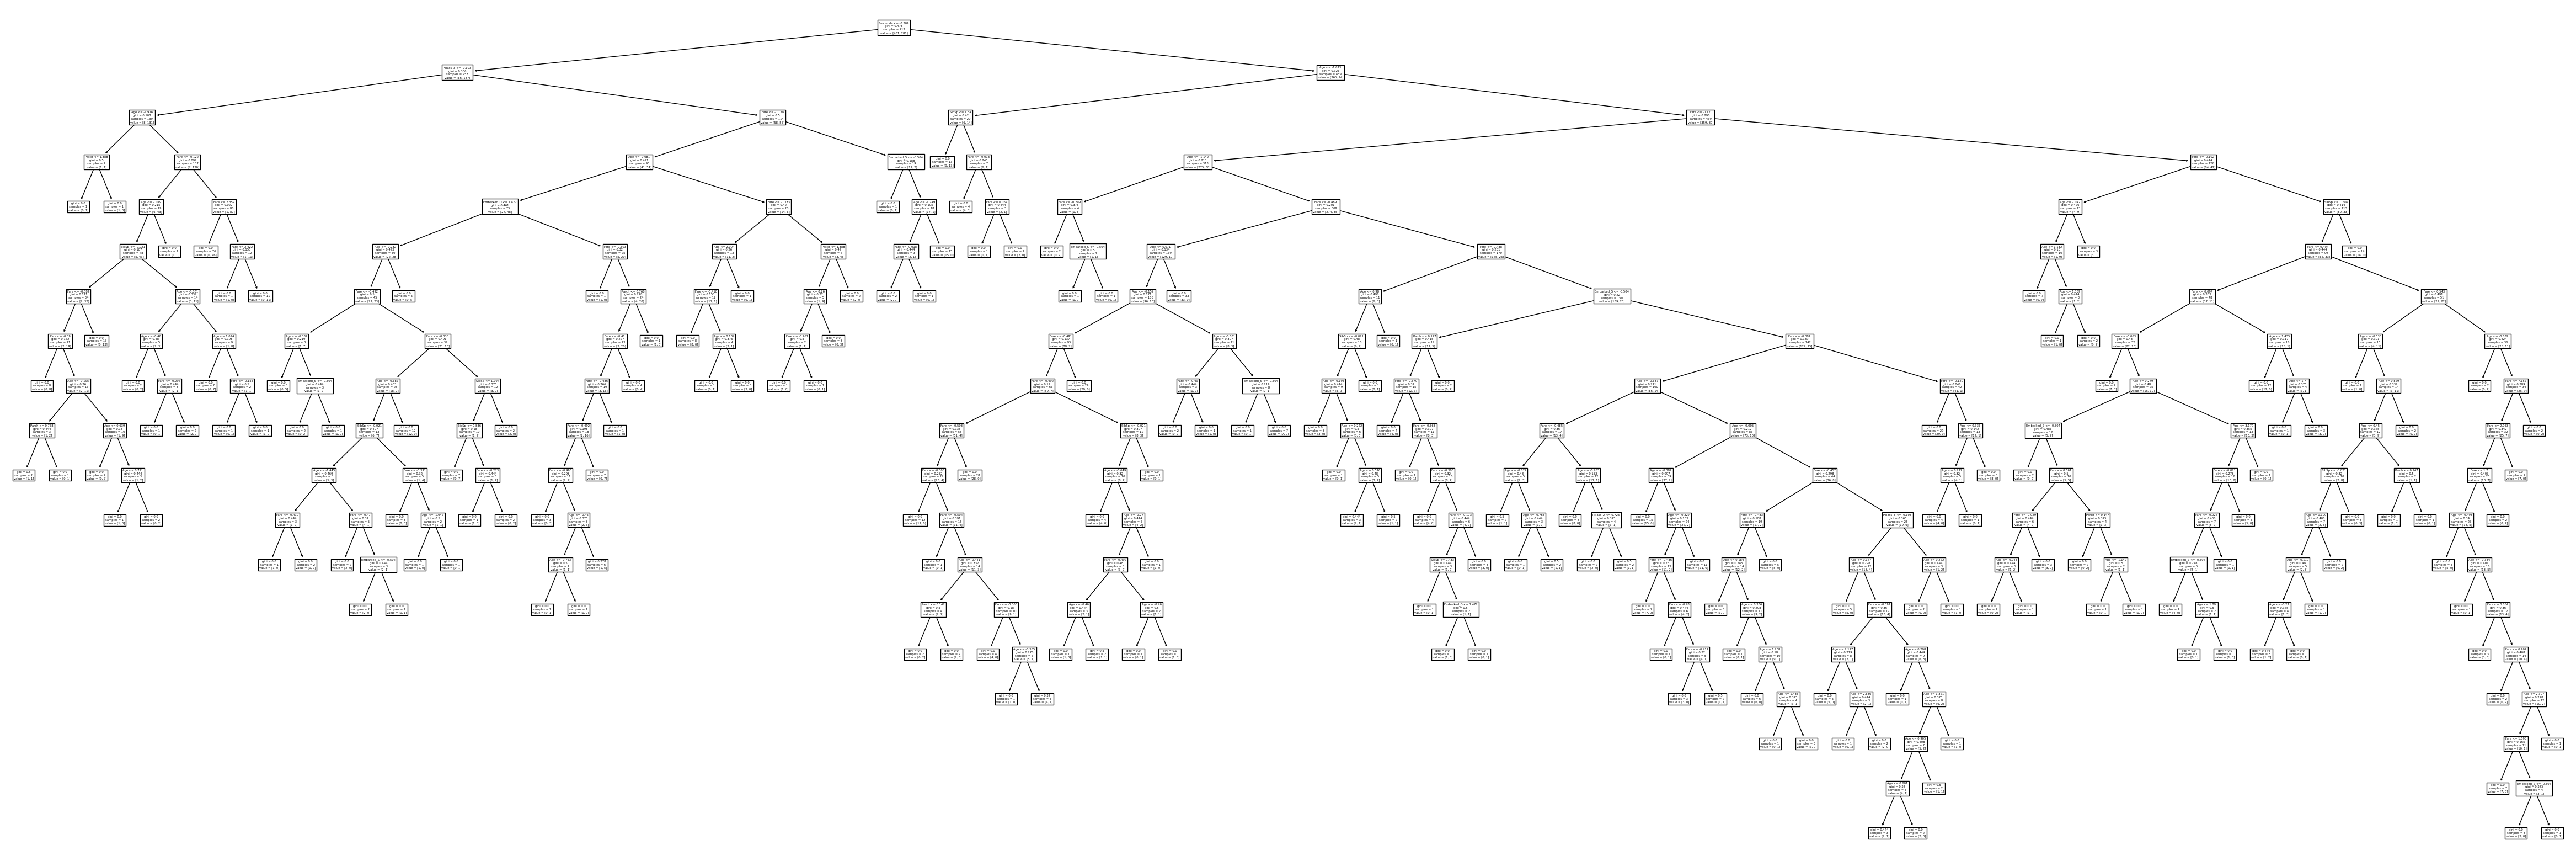

In [61]:
plt.figure(figsize=(60,20))  # customize according to the size of your tree
_ = tree.plot_tree(dtc,  feature_names = X_train.columns.tolist())
plt.show()

In [62]:
test_df=pd.read_csv('../../data/titanic_test.csv')

In [63]:
test_df.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [64]:
sub=pd.read_csv('../../data/gender_submission.csv')

In [65]:
sub.head(4)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0


In [66]:
actual_test_df=test_df.copy()

In [67]:
test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [68]:
features_nan=[feature for feature in test_df.columns if  test_df[feature].isnull().sum()>1]
for feature in features_nan:
    print('Feature : {} , % of null : {}'.format(feature,np.round(test_df[feature].isnull().mean(),3) *100))

Feature : Age , % of null : 20.599999999999998


<AxesSubplot:>

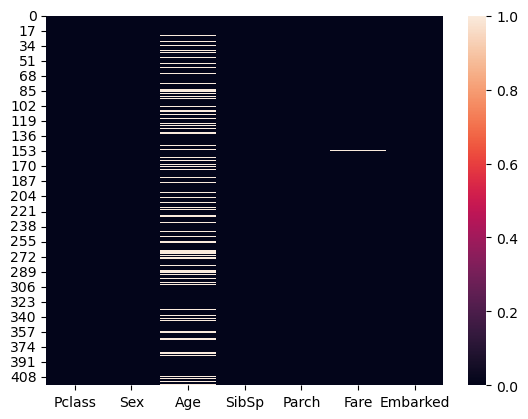

In [69]:
sns.heatmap(test_df.isnull())

In [70]:
imp_df=test_df[['Age','Embarked','Fare']]
imp_df_scaled=imp.fit_transform(imp_df)
imputed_df=pd.DataFrame(imp_df_scaled,columns=imp_df.columns)
test_df['Age']=imputed_df['Age']
test_df['Embarked']=imputed_df['Embarked']
test_df['Fare']=imputed_df['Fare']

<AxesSubplot:>

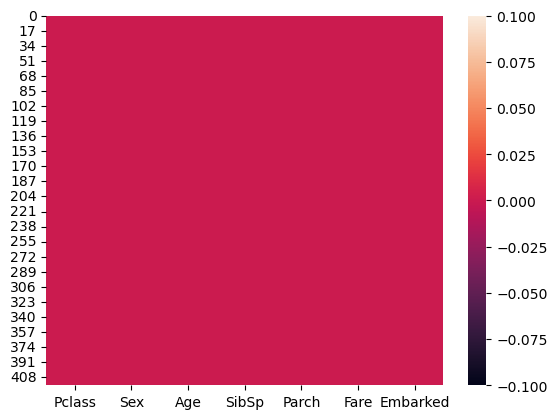

In [71]:
sns.heatmap(test_df.isnull())

In [72]:
# Encoding
X = pd.get_dummies(test_df, columns = category_cols,drop_first=True)
#Scaling
scaled_df = scalar.fit_transform(X)
X_scaled=pd.DataFrame(scaled_df,columns=X.columns)

In [73]:
X_scaled

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.466044,-0.499470,-0.400248,-0.497063,-0.534933,0.957826,0.755929,2.843757,-1.350676
1,1.415579,0.616992,-0.400248,-0.511926,-0.534933,0.957826,-1.322876,-0.351647,0.740370
2,2.555021,-0.499470,-0.400248,-0.463754,1.869391,-1.044031,0.755929,2.843757,-1.350676
3,-0.103676,-0.499470,-0.400248,-0.482127,-0.534933,0.957826,0.755929,-0.351647,0.740370
4,-0.483490,0.616992,0.619896,-0.417151,-0.534933,0.957826,-1.322876,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...
413,-0.559453,-0.499470,-0.400248,-0.493105,-0.534933,0.957826,0.755929,-0.351647,0.740370
414,0.807877,-0.499470,-0.400248,1.314557,-0.534933,-1.044031,-1.322876,-0.351647,-1.350676
415,0.769896,-0.499470,-0.400248,-0.507445,-0.534933,0.957826,0.755929,-0.351647,0.740370
416,-0.559453,-0.499470,-0.400248,-0.493105,-0.534933,0.957826,0.755929,-0.351647,0.740370


In [74]:
sgd_prediction=sgd.predict(X_scaled)

In [75]:
actual=sub['Survived']

In [76]:
print(confusion_matrix(actual,sgd_prediction))
print(classification_report(actual,sgd_prediction))

[[254  12]
 [  8 144]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [77]:
svc_prediction=svc.predict(X_scaled)

In [78]:
print(confusion_matrix(actual,svc_prediction))
print(classification_report(actual,svc_prediction))

[[256  10]
 [ 41 111]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       266
           1       0.92      0.73      0.81       152

    accuracy                           0.88       418
   macro avg       0.89      0.85      0.86       418
weighted avg       0.88      0.88      0.87       418



In [79]:
dtc_prediction=dtc.predict(X_scaled)
print(confusion_matrix(actual,dtc_prediction))
print(classification_report(actual,dtc_prediction))

[[225  41]
 [ 37 115]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       266
           1       0.74      0.76      0.75       152

    accuracy                           0.81       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.81      0.81       418



In [80]:
lsvm_prediction=lsvm.predict(X_scaled)
print(confusion_matrix(actual,lsvm_prediction))
print(classification_report(actual,lsvm_prediction))

[[261   5]
 [  8 144]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       266
           1       0.97      0.95      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.96      0.97       418
weighted avg       0.97      0.97      0.97       418



In [85]:
submission=sub.copy()

In [86]:
submission['Survived']=lsvm_prediction

In [88]:
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [89]:
submission.to_csv('../../data/titanic_submission.csv',header = True,index = False)